In [66]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
from lxml import etree

header = {
    'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.0.0 Safari/537.36 Edg/112.0.1722.58'
}

Question 1: Use yfinance to Extract Stock Data

Reset the index, save, and display the first five rows of the `tesla_data`  dataframe using the  `head`  function. Upload a screenshot of the results and code from the beginning of Question 1 to the results below.

In [67]:
tesla = yf.Ticker("AAPL")
tesla_share_price_data = tesla.history(period="max")
tesla_share_price_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.099450,0.099882,0.099450,0.099450,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.094694,0.094694,0.094261,0.094261,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.087775,0.087775,0.087343,0.087343,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.089504,0.089937,0.089504,0.089504,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.092099,0.092532,0.092099,0.092099,73449600,0.0,0.0


Question 2: Use Webscraping to Extract Tesla Revenue Data

Display the last five rows of the `tesla_revenue`  dataframe using the `tail`  function. Upload a screenshot of the results.

In [68]:
url = 'https://finance.yahoo.com/quote/TSLA/history?p=TSLA'
data  = requests.get(url,headers=header)
text = etree.HTML(data.text)

text.xpath('//*[@id="Col1-1-HistoricalDataTable-Proxy"]/section/div[2]/table/tbody/tr[1]/td[6]/span/text()')
get_data = text.xpath('//*[@id="Col1-1-HistoricalDataTable-Proxy"]/section/div[2]/table/tbody/tr')


date_all = []
Open_all = []
high_all = []
low_all = []
close_all = []
adj_close_all = []
volume_all = []

for i in get_data:
    date = i.xpath('./td[1]/span/text()')
    date_all.append(date)
    Open = i.xpath('./td[2]/span/text()')
    Open_all.append(Open)
    high = i.xpath('./td[3]/span/text()')
    high_all.append(high)
    low = i.xpath('./td[4]/span/text()')
    low_all.append(low)
    close = i.xpath('./td[5]/span/text()')
    close_all.append(close)
    adj_close = i.xpath('./td[6]/span/text()')
    adj_close_all.append(adj_close)
    volume = i.xpath('./td[7]/span/text()')
    volume_all.append(volume)


tesla_revenue = pd.DataFrame({
    "Date":date_all, 
    "Open":Open_all, 
    "High":high_all, 
    "Low":low_all, 
    "Close":close_all, 
    "Adj Close":adj_close_all, 
    "Volume":volume_all})    

In [72]:
tesla_revenue.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
95,"[Mar 27, 2023]",[194.42],[197.39],[189.94],[191.81],[191.81],"[120,851,600]"
96,"[Mar 24, 2023]",[191.65],[192.36],[187.15],[190.41],[190.41],"[116,312,400]"
97,"[Mar 23, 2023]",[195.26],[199.31],[188.65],[192.22],[192.22],"[144,193,900]"
98,"[Mar 22, 2023]",[199.30],[200.66],[190.95],[191.15],[191.15],"[150,376,400]"
99,"[Mar 21, 2023]",[188.28],[198.00],[188.04],[197.58],[197.58],"[153,391,400]"


Question 3: Use yfinance to Extract Stock Data

Reset the index, save, and display the first five rows of the `gme_data`  dataframe using the `head`  function. Upload a screenshot of the results and code from the beginning of Question 1 to the results below.

In [73]:
gme_data = yf.Ticker("gme_data")
gme_data_share_price_data = tesla.history(period="max")
gme_data_share_price_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.099450,0.099882,0.099450,0.099450,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.094694,0.094694,0.094261,0.094261,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.087775,0.087775,0.087343,0.087343,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.089504,0.089937,0.089504,0.089504,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.092099,0.092532,0.092099,0.092099,73449600,0.0,0.0


Question 4: Use Webscraping to Extract GME Revenue Data

Display the last five rows of the `gme_revenue`  dataframe using the  `tail`  function. Upload a screenshot of the results.

In [77]:
url = 'https://finance.yahoo.com/quote/GEM/history?p=GEM'
data  = requests.get(url,headers=header)
text = etree.HTML(data.text)

text.xpath('//*[@id="Col1-1-HistoricalDataTable-Proxy"]/section/div[2]/table/tbody/tr[1]/td[6]/span/text()')
get_data = text.xpath('//*[@id="Col1-1-HistoricalDataTable-Proxy"]/section/div[2]/table/tbody/tr')


date_all = []
Open_all = []
high_all = []
low_all = []
close_all = []
adj_close_all = []
volume_all = []

for i in get_data:
    date = i.xpath('./td[1]/span/text()')
    date_all.append(date)
    Open = i.xpath('./td[2]/span/text()')
    Open_all.append(Open)
    high = i.xpath('./td[3]/span/text()')
    high_all.append(high)
    low = i.xpath('./td[4]/span/text()')
    low_all.append(low)
    close = i.xpath('./td[5]/span/text()')
    close_all.append(close)
    adj_close = i.xpath('./td[6]/span/text()')
    adj_close_all.append(adj_close)
    volume = i.xpath('./td[7]/span/text()')
    volume_all.append(volume)


gme_data = pd.DataFrame({
    "Date":date_all, 
    "Open":Open_all, 
    "High":high_all, 
    "Low":low_all, 
    "Close":close_all, 
    "Adj Close":adj_close_all, 
    "Volume":volume_all})   

gme_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
95,"[Mar 28, 2023]",[29.15],[29.40],[29.13],[29.36],[29.17],"[1,636,000]"
96,"[Mar 27, 2023]",[28.76],[28.91],[28.73],[28.86],[28.68],"[210,800]"
97,"[Mar 27, 2023]",[Dividend],[],[],[],[],[]
98,"[Mar 24, 2023]",[29.15],[29.30],[29.12],[29.30],[28.78],"[69,500]"
99,"[Mar 23, 2023]",[29.49],[29.70],[29.26],[29.39],[28.86],"[70,300]"


Question 5: Plot Tesla Stock Graph

Use the `make_graph`  function to graph the Tesla Stock Data, also provide a title for the graph.

<Axes: title={'center': 'Tesla Stock'}, xlabel='Date'>

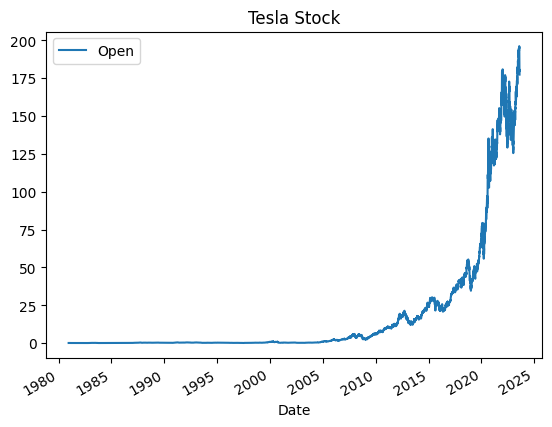

In [87]:
tesla_share_price_data.reset_index(inplace=True)
tesla_share_price_data.plot(x="Date", y="Open",title='Tesla Stock')



Question 6: Plot GameStop Stock Graph

Use the `make_graph`  function to graph the GameStop Stock Data, also provide a title for the graph.

<Axes: title={'center': 'GameStop Stock'}, xlabel='Date'>

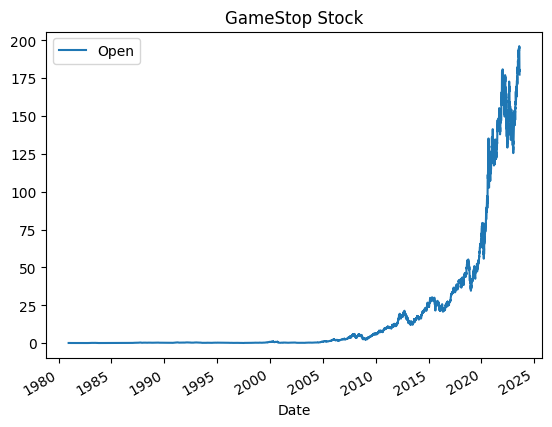

In [88]:
gme_data_share_price_data.reset_index(inplace=True)
gme_data_share_price_data.plot(x="Date", y="Open",title='GameStop Stock')
